# 8 УРОК JOIN

## Основные типы объединений JOIN
Вот мы и подобрались к одной из важнейших тем в SQL — объединению таблиц. 

SQL-запросы позволяют выбирать и обрабатывать данные не только из одной таблицы — в этом мы уже убедились, когда работали с подзапросами. Но таблицы можно также объединять в один результирующий набор записей, связывая их по определённым условиям. Это позволяет делать операция соединения JOIN.

В этом уроке мы рассмотрим следующие типы соединений таблиц:

INNER JOIN
LEFT/RIGHT JOIN
FULL JOIN
CROSS JOIN
Операторы соединения включаются в раздел FROM запроса. В общем виде, вне зависимости от того, какой тип соединения используется, запрос на объединение таблиц выглядит следующим образом:

SELECT ...
FROM table_1 
     JOIN table_2
     ON [condition]
...


Как правило (но далеко не всегда), в качестве условия [condition], по которому происходит объединение, выступает равенство значений в определённых столбцах. В качестве таких столбцов обычно используются ключи с указанием id (товара, пользователя и т.д.), то есть значений, по которым можно однозначно идентифицировать определённую сущность:

SELECT table_1.column_1, table_2.column_2
FROM table_1 
     JOIN table_2
     ON table_1.id = table_2.id
...


При этом у каждой колонки рекомендуется через точку указывать имя таблицы, которая содержит эту колонку. Более того, это становится уже не рекомендацией, а необходимостью, когда имена столбцов в таблицах совпадают — без явного указания источников база данных не сможет сама определить, какие столбцы и в каких таблицах вы имеете в виду, и в результате вернёт ошибку.

Если имена таблиц слишком длинные, таблицам можно присвоить алиасы. По этим же алиасам можно сразу удобно обращаться к колонкам:

SELECT a.column_1, b.column_2
FROM table_1 a 
     JOIN table_2 b
     ON a.id = b.id
...


Если имя поля, по которому происходит объединение, совпадает в обеих таблицах (как в примерах выше), то можно использовать сокращенную запись c оператором USING:

SELECT a.column_1, b.column_2
FROM table_1 a 
     JOIN table_2 b
     USING (id)
...


При объединении таблиц можно также использовать подзапросы. Их можно объединять с другими таблицами или друг с другом:

SELECT ...
FROM table_1
     JOIN (
          SELECT ...
          FROM table_2
     ) AS subquery
    ON table_1.id = subquery.id
...


SELECT ...
FROM (
     SELECT ...
     FROM table_1
) AS subquery_1
     JOIN (
          SELECT ...
          FROM table_2
     ) AS subquery_2
    ON subquery_1.id = subquery_2.id
...


Хорошо, с записью в общем виде вроде бы понятно. Но что же на самом деле происходит при объединении таблиц? Давайте разбираться.

Процесс объединения можно представить в виде следующей последовательности операций:

Сначала каждая строка первой таблицы сопоставляется с каждой строкой второй таблицы. т.е. происходит декартово произведение двух множеств, результатом которого является новое множество, состоящее из всевозможных пар исходных строк. Например, если в одной таблице было 50 записей, а в другой 10, то в результате декартова произведения получится 500 записей. На игрушечном примере это можно представить следующим образом:

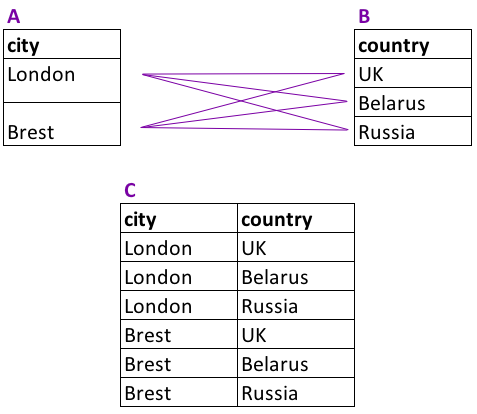

2. Затем для каждой объединённой строки, состоящей из строк двух исходных таблиц, проверяется условие соединения, указанное после оператора ON.

3. После этого в соответствии с выбранным типом объединения формируется результирующая таблица. 

При соединении не двух, а нескольких таблиц, операция соединения выполняется последовательно несколько раз, т.е. описанный выше алгоритм запускается столько раз, сколько указано соединений. При этом в этой последовательности при каждом объединении может использоваться любой тип соединения (INNER, LEFT и т.д.).

Для двух соединений запрос может выглядеть примерно следующим образом:

SELECT a.column_1, b.column_2
FROM table_1 a 
     LEFT JOIN table_2 b
     ON a.user_id = b.user_id
     JOIN table_3 c
     ON b.order_id = c.order_id
...


О том, как именно выбор типа JOIN влияет на результат, мы и будем говорить в этом уроке.

Если что-то на этом шаге осталось непонятным, не переживайте. Сейчас всё проясним на практических примерах!




## Задача 1. INNER JOIN
Первый тип объединения, который мы рассмотрим, называется INNER JOIN. Это оператор внутреннего соединения, для которого совершенно неважен порядок указания таблиц, т.е. в следующих случаях результат объединения будет одинаковым:

SELECT ...
FROM table_1 INNER JOIN table_2
     ON [condition]
...


SELECT ...
FROM table_2 INNER JOIN table_1 
     ON [condition]
...


При этом в запросе вместо INNER JOIN можно писать просто JOIN — это одно и то же.

Результат объединения INNER JOIN формируется следующим образом:

Сначала каждая строка первой таблицы сопоставляется с каждой строкой второй таблицы (происходит декартово произведение).
Затем для каждой объединённой строки проверяется условие соединения, указанное после оператора ON.
После этого все объединённые строки, для которых условие оказалось истинным, добавляются в результирующую таблицу.
Таким образом, в результате объединения INNER JOIN из двух таблиц отбрасываются все строки, которые не прошли проверку на соответствие указанному условию. Вот и всё!

Рассмотрим следующий игрушечный пример:

SELECT A.id as id,
       A.city as city,
       B.country as country
FROM table_A as A
     JOIN table_B as B
     ON A.id = B.id


В результате такого запроса таблицы table_A и table_B будут объединены в таблицу table_С:

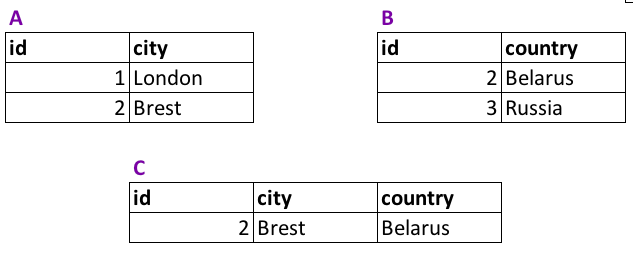

Поскольку таблицы совпадают только по одному значению в столбце id, то в результат будет включена только одна запись.

Схематично результат работы объединений принято изображать в виде диаграмм Венна. Для INNER JOIN диаграмма выглядит так:

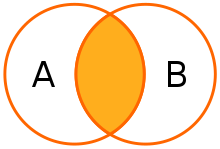

На заметку:

Подробнее про INNER JOIN можно почитать здесь.

А теперь давайте вернёмся к нашей базе данных и решим задачу.

Для начала попробуйте выполнить в Redash следующие два запроса и посчитать количество уникальных пользователей в таблицах users и user_actions:

SELECT COUNT(DISTINCT user_id)
FROM users


SELECT COUNT(DISTINCT user_id)
FROM user_actions


Вы заметите, что в таблице user_actions уникальных пользователей больше. Это значит, что про часть пользователей мы что-то не знаем — у нас попросту нет о них информации в таблице users. Поэтому в результате соединения этих двух таблиц с помощью INNER JOIN эта часть пользователей будет исключена из результата.

Задание:

Объедините таблицы user_actions и users по ключу user_id. В результат включите две колонки с user_id из обеих таблиц. Эти две колонки назовите соответственно user_id_left и user_id_right. Также в результат включите колонки order_id, time, action, sex, birth_date. Отсортируйте получившуюся таблицу по возрастанию id пользователя (в любой из двух колонок с id), добавьте LIMIT 1000 в конец запроса.

Поля в результирующей таблице: user_id_left, user_id_right,  order_id, time, action, sex, birth_date

Пояснение:

Обратите внимание, что в результате объединения колонки с ключами (в нашем случае это user_id) не превращаются в одну общую колонку, а вместе добавляются в результирующую таблицу. То есть сколько было суммарно колонок в двух таблицах, столько окажется и в результирующей таблице после объединения. А уже далее в операторе SELECT можно выбирать нужные и проводить над ними операции.

Чтобы обратиться к колонкам с одинаковым именем (user_id), пришедшим из разных таблиц, назначьте таблицам алиасы и обратитесь к колонкам через них. Пример, как это можно сделать:

SELECT A.id as id_a, 
       B.id as id_b, 
       ...
FROM table_A as A
     JOIN table_B as B
     ON A.id = B.id
...


После того как решите задачу, обратите внимание на колонки с user_id. Все ли значения в них попарно совпадают?



##### ОТВЕТ:

In [ ]:
SELECT l.user_id AS user_id_left,
        r.user_id AS user_id_right, 
        order_id, time,
        action,
        sex,
        birth_date
FROM user_actions l
JOIN users r
USING(user_id)
ORDER BY 1
LIMIT 1000

## Задача 2. INNER JOIN
Задание:

А теперь попробуйте немного переписать запрос из прошлого задания и посчитать количество уникальных id в объединённой таблице. То есть снова объедините таблицы, но в этот раз просто посчитайте уникальные user_id в одной из колонок с id. Выведите это количество в качестве результата. Колонку с посчитанным значением назовите users_count.

Поле в результирующей таблице: users_count

После того как решите задачу, сравните полученное значение с количеством уникальных пользователей в таблицах users и user_actions, которое мы посчитали на прошлом шаге. С каким значением оно совпадает?

##### ОТВЕТ:

In [ ]:
SELECT COUNT(DISTINCT l.user_id) AS users_count
FROM user_actions l
JOIN users r
USING(user_id)

## Задача 3. LEFT JOIN
Следующий тип соединения, который мы рассмотрим, — это LEFT OUTER JOIN (или просто LEFT JOIN). 

LEFT JOIN — это оператор внешнего соединения, для которого важен порядок таблиц в запросе, т.е. в отличие от INNER JOIN он не является симметричным.

Поэтому следующие две записи уже не являются эквивалентными:

SELECT ...
FROM table_1 LEFT JOIN table_2
     ON [condition]
...


SELECT ...
FROM table_2 LEFT JOIN table_1 
     ON [condition]
...


Результат объединения LEFT JOIN формируется следующим образом:

Сначала каждая строка левой таблицы сопоставляется с каждой строкой правой таблицы (происходит декартово произведение).
Затем для каждой объединённой строки проверяется условие соединения, указанное после оператора ON.
После этого все объединённые строки, для которых условие оказалось истинным, добавляются в результирующую таблицу.
Далее в результат добавляются те записи из левой таблицы (внимание: только из левой), для которых условие оказалось ложным и которые не вошли в соединение на предыдущем шаге. При этом для таких записей соответствующие поля из правой таблицы заполняются значениями NULL.
Если внимательно посмотреть на описанный алгоритм, то можно понять, что он легко сводится к следующей последовательности действий:

Сначала в соответствии с указанным условием выполняется INNER JOIN первой и второй таблиц.
Затем в результат добавляются те записи из левой таблицы (внимание: только из левой), для которых условие оказалось ложным и которые не вошли в соединение на предыдущем шаге. При этом для таких записей соответствующие поля из правой таблицы заполняются значениями NULL.
Вот и вся магия!

Соединение RIGHT JOIN работает аналогичным образом, только на втором этапе в результат INNER JOIN добавляются записи не из левой, а из правой таблицы.

Давайте снова рассмотрим пару простых примеров.

Так будет выглядеть запрос и его результат с LEFT JOIN:

SELECT A.id as id,
       A.city as city,
       B.country as country
FROM table_A as A
     LEFT JOIN table_B as B
     ON A.id = B.id


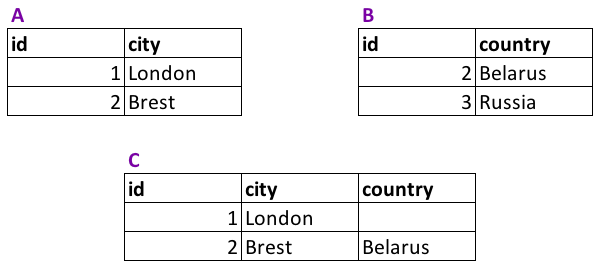



В данном случае в результат попадёт запись с id 2, так как она есть в обеих таблицах, а также запись с id 1 из левой таблицы.

Диаграмма Венна для LEFT JOIN выглядит так:

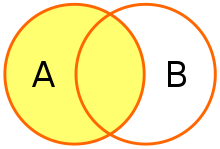

А вот таким получится результат запроса с RIGHT JOIN:

SELECT B.id as id,
       A.city as city,
       B.country as country
FROM table_A as A
     RIGHT JOIN table_B as B
     ON A.id = B.id
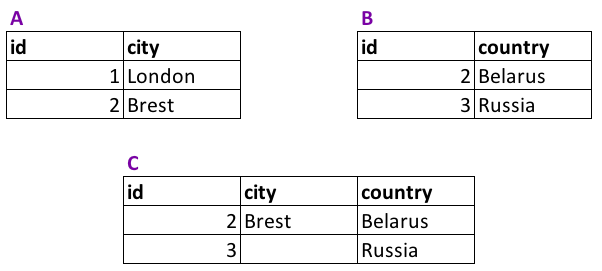

Всё как и в случае с LEFT JOIN, только в результат уже попадёт недостающая запись с id 3 из правой таблицы.

Диаграмма Венна для RIGHT JOIN:

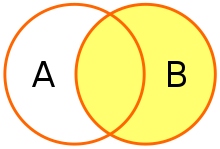

На заметку:

Подробнее про LEFT JOIN можно почитать здесь.

А теперь рассмотрим всё на примере наших данных.

Задание:

С помощью LEFT JOIN объедините таблицы user_actions и users по ключу user_id. Обратите внимание на порядок таблиц — слева users_actions, справа users. В результат включите две колонки с user_id из обеих таблиц. Эти две колонки назовите соответственно user_id_left и user_id_right. Также в результат включите колонки order_id, time, action, sex, birth_date. Отсортируйте получившуюся таблицу по возрастанию id пользователя (в колонке из левой таблицы). Добавьте LIMIT 1000.

Поля в результирующей таблице: user_id_left, user_id_right,  order_id, time, action, sex, birth_date

После того как решите задачу, обратите внимание на колонки с user_id. Нет ли в какой-то из них пропущенных значений?

##### ОТВЕТ:

In [ ]:
SELECT l.user_id AS user_id_left,
        r.user_id AS user_id_right, 
        order_id, time,
        action,
        sex,
        birth_date
FROM user_actions l
LEFT JOIN users r
USING(user_id)
ORDER BY 1
LIMIT 1000

## Задача 4. LEFT JOIN
Задание:

Теперь снова попробуйте немного переписать запрос из прошлого задания и посчитайте количество уникальных id в колонке user_id, пришедшей из левой таблицы user_actions. Выведите это количество в качестве результата. Колонку с посчитанным значением назовите users_count.

Поле в результирующей таблице: users_count

После того как решите задачу, сравните полученное значение с количеством уникальных пользователей в таблицах users и user_actions. С каким значением оно совпало в этот раз?



##### ОТВЕТ:

In [ ]:
SELECT COUNT(DISTINCT l.user_id) AS users_count
FROM user_actions l
LEFT JOIN users r
USING(user_id)

## Задача 5. LEFT JOIN
Вы могли заметить, что при объединении таблиц user_actions и users с помощью LEFT JOIN в столбцах, пришедших из правой таблицы users образовались NULL значения. Если не заметили, то попробуйте прямо в интерфейсе Redash отсортировать объединённую таблицу по полям users.user_id и users.birth_date.

Это как раз то, о чём мы говорили — при формировании объединённых строк для тех id из левой таблицы, которых не оказалось в правой таблице, поля из правой таблицы были заполнены пустыми значениями.

А теперь давайте провернём один трюк.

Задание:

Возьмите запрос из задания 3, где вы объединяли таблицы user_actions и users с помощью LEFT JOIN, добавьте к запросу оператор WHERE и исключите NULL значения в колонке user_id из правой таблицы. Включите в результат все те же колонки и отсортируйте получившуюся таблицу по возрастанию id пользователя в колонке из левой таблицы. Добавьте LIMIT 1000.

Поля в результирующей таблице: user_id_left, user_id_right,  order_id, time, action, sex, birth_date

После того как решите задачу, попробуйте сдать это же решение в первом задании — сработает или нет? Подумайте, какой JOIN мы сейчас получили после всех манипуляций с результатом. Заодно можете посчитать число уникальных user_id в запросе из этого задания, чтобы расставить все точки над «i».



##### ОТВЕТ:

In [ ]:
SELECT  l.user_id AS user_id_left,
        r.user_id AS user_id_right, 
        order_id, time,
        action,
        sex,
        birth_date
FROM user_actions l
LEFT JOIN users r
USING(user_id)
WHERE r.user_id IS NOT NULL
ORDER BY 1
LIMIT 1000

## Задача 6. FULL JOIN
А чтобы лучше разобраться с джойнами, рассмотрим ещё один тип объединения таблиц — FULL OUTER JOIN или просто FULL JOIN. Это оператор полного внешнего соединения, для которого, как и для INNER JOIN, неважен порядок указания таблиц. Однако работает он совсем по-другому.

Запрос с FULL OUTER JOIN выглядит примерно так:

SELECT ...
FROM table_1 FULL JOIN table_2
     ON [condition]
...


SELECT ...
FROM table_2 FULL JOIN table_1 
     ON [condition]
...


Результат объединения FULL JOIN формируется следующим образом:

Сначала каждая строка левой таблицы сопоставляется с каждой строкой правой таблицы (происходит декартово произведение).
Затем для каждой объединённой строки проверяется условие соединения, указанное после оператора ON.
После этого все объединённые строки, для которых условие оказалось истинным, добавляются в результирующую таблицу.
Далее в результат добавляются те записи из левой и правой таблиц (внимание: из обеих таблиц), для которых условие оказалось ложным и которые не вошли в соединение на предыдущем шаге. При этом для таких записей соответствующие поля из другой таблицы (для левой — это поля из правой, для правой — это поля из левой) заполняются значениями NULL.
Этот алгоритм можно свести к следующей последовательности действий:

Сначала в соответствии с указанным условием выполняется INNER JOIN левой и правой таблиц.
Далее в результат добавляются те записи из левой и правой таблиц (внимание: из обеих таблиц), для которых условие оказалось ложным и которые не вошли в соединение на предыдущем шаге. При этом для таких записей соответствующие поля из другой таблицы (для левой — это поля из правой, для правой — это поля из левой) заполняются значениями NULL.
Рассмотрим простой пример.

Так будет выглядеть запрос и его результат с FULL JOIN:

SELECT A.id as id,
       A.city as city,
       B.country as country
FROM table_A as A
     FULL JOIN table_B as B
     ON A.id = B.id

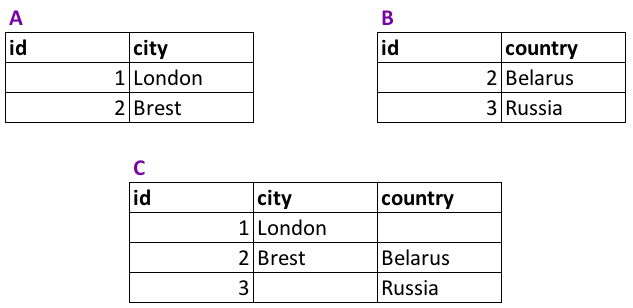


В результат попала общая запись с id 2, а также все недостающие записи из других таблиц. Все несоответствия были заполнены пустыми значениями.

Диаграмма Венна для FULL JOIN:

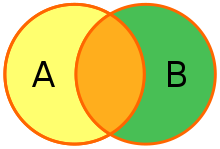

На заметку:

Подробнее про FULL JOIN можно почитать здесь.

А теперь давайте разберёмся с FULL JOIN на примере нашей базы данных.

У нас есть две таблицы с датами рождения пользователей и курьеров — users и couriers. Можно предположить, что в каждой таблице в колонке birth_date есть какие-то даты, которых нет в другой таблице. То есть есть такие даты, в которые родился кто-то из курьеров, но не родился ни один пользователь, и наоборот. Ну что ж, давайте попробуем проверить эту гипотезу.

Для начала сгруппируем две таблицы по колонке birth_date и посчитаем, сколько пользователей/курьеров родились в каждый из дней. Для этого можете выполнить в Redash следующие запросы: 

SELECT birth_date, COUNT(user_id) AS users_count
FROM users
WHERE birth_date IS NOT NULL
GROUP BY birth_date


SELECT birth_date, COUNT(courier_id) AS couriers_count
FROM couriers
WHERE birth_date IS NOT NULL
GROUP BY birth_date


В результате у вас получатся две таблицы с уникальными датами и количеством людей, родившихся в каждый из дней. Давайте их объединим.

Задание:

С помощью FULL JOIN объедините по ключу birth_date таблицы, полученные в результате вышеуказанных запросов (то есть объедините друг с другом два подзапроса). В результат включите две колонки с birth_date из обеих таблиц. Эти две колонки назовите соответственно users_birth_date и couriers_birth_date. Также включите в результат колонки с числом пользователей и курьеров — users_count и couriers_count. Отсортируйте получившуюся таблицу сначала по колонке users_birth_date по возрастанию, затем по колонке couriers_birth_date — тоже по возрастанию.

Поля в результирующей таблице: users_birth_date, users_count,  couriers_birth_date, couriers_count

После того как решите задачу, поизучайте полученную таблицу в Redash. Обратите внимание на пропущенные значения в колонках с датами рождения курьеров и пользователей. Подтвердилось ли наше предположение?

##### ОТВЕТ:

In [ ]:
SELECT  l.birth_date AS users_birth_date,
        users_count,
        r.birth_date AS couriers_birth_date,
        couriers_count
        
FROM (SELECT birth_date, COUNT(user_id) AS users_count
        FROM users
        WHERE birth_date IS NOT NULL
        GROUP BY birth_date) l
FULL JOIN (SELECT birth_date, COUNT(courier_id) AS couriers_count
        FROM couriers
        WHERE birth_date IS NOT NULL
        GROUP BY birth_date) r
USING(birth_date)

ORDER BY 1, 3

## Задача 7. Операции с множествами
Отлично. Запрос с FULL JOIN мы вроде бы составили, но как нам теперь определить, что количество записей в полученной таблице совпадает с общим числом уникальных дат в двух таблицах — users и couriers? Ведь именно столько строк мы и ожидали получить, верно? 

Проверить себя нам помогут операции с множествами. В языке SQL их три:

UNION
EXCEPT
INTERSECT
Они позволяют комбинировать результаты нескольких запросов друг с другом и получать один общий результат. Причём именно комбинировать, а не объединять, как это делают джойны.

Эту разницу важно понимать: в операциях с множествами не происходит совмещения столбцов из двух таблиц — база данных просто отбирает строки из таблиц, удовлетворяющие типу операции, и добавляет их в общий результат.

Операции с множествами имеют следующий синтаксис:

SELECT column_1, column_2
FROM table_1
UNION
SELECT column_1, column_2
FROM table_2


SELECT column_1, column_2
FROM table_1
EXCEPT
SELECT column_1, column_2
FROM table_2


SELECT column_1, column_2
FROM table_1
INTERSECT
SELECT column_1, column_2
FROM table_2


Операция UNION объединяет записи из двух запросов в один общий результат (объединение множеств).

Операция EXCEPT возвращает все записи, которые есть в первом запросе, но отсутствуют во втором (разница множеств).

Операция INTERSECT возвращает все записи, которые есть и в первом, и во втором запросе (пересечение множеств).

При этом по умолчанию эти операции исключают из результата строки-дубликаты. Чтобы дубликаты не исключались из результата, необходимо после имени операции указать ключевое слово ALL. Например, так:

SELECT column_1, column_2
FROM table_1
UNION ALL
SELECT column_1, column_2
FROM table_2


Диаграммы Венна для операций выглядят следующим образом:

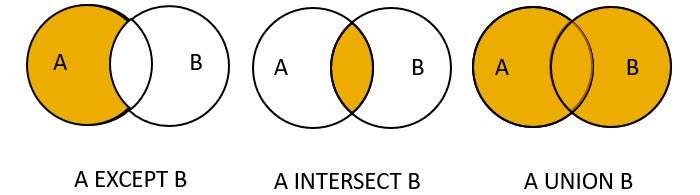

Для работы этих операций необходимо, чтобы выполнялись следующие условия:

В каждом запросе в SELECT должно быть одинаковое количество столбцов.
Типы данных в столбцах должны быть совместимы.
При этом количество столбцов в операторе SELECT может быть любым — главное, чтобы оно было одинаковым.

Например, следующий запрос вернёт уникальные id пользователей, которые что-то заказывали в нашем сервисе, но которых по какой-то причине нет в таблице users:

SELECT user_id
FROM user_actions
EXCEPT
SELECT user_id
FROM users


Попробуйте самостоятельно запустить этот запрос в Redash и посмотрите на результат.

На заметку:

Подробнее про операцию UNION можно узнать здесь. Про EXCEPT — здесь. Про INTERSECT — тут.

О теории множеств можно почитать здесь.

Задача:

Объедините два следующих запроса друг с другом так, чтобы на выходе получился набор уникальных дат из таблиц users и couriers:

SELECT birth_date
FROM users
WHERE birth_date IS NOT NULL


SELECT birth_date
FROM couriers
WHERE birth_date IS NOT NULL


Поместите в подзапрос полученный после объединения набор дат и посчитайте их количество. Колонку с числом дат назовите dates_count.

Поле в результирующей таблице: dates_count

После того как решите задачу, сравните полученное число дат с количеством строк в таблице, которую мы получили в прошлом задании. Совпали ли эти значения?



##### ОТВЕТ:

In [ ]:
SELECT COUNT(birth_date) AS dates_count
FROM(
    SELECT birth_date
    FROM users
    WHERE users.birth_date IS NOT NULL
    UNION
    SELECT birth_date
    FROM couriers
    WHERE couriers.birth_date IS NOT NULL
    ) t1

## Задача 8. CROSS JOIN
В начале урока мы обещали рассмотреть ещё один тип объединения таблиц — CROSS JOIN. Держим слово!

На самом деле CROSS JOIN — это просто декартово произведение двух таблиц, то есть именно то, что происходит на первом этапе остальных джойнов. Важное отличие в синтаксисе CROSS JOIN состоит в том, что для него не нужно указывать условие для соединения:

SELECT column_1, column_2, ...
FROM table_1
     CROSS JOIN table_2


Тот же результат можно получить с помощью следующей записи:

SELECT column_1, column_2, ...
FROM table_1, table_2


Рассмотрим простой пример:

SELECT
    A.city as city,
    B.country as country
FROM table_A as A
     CROSS JOIN table_B as B


С помощью CROSS JOIN мы получаем все возможные комбинации значений из первой и второй таблицы:

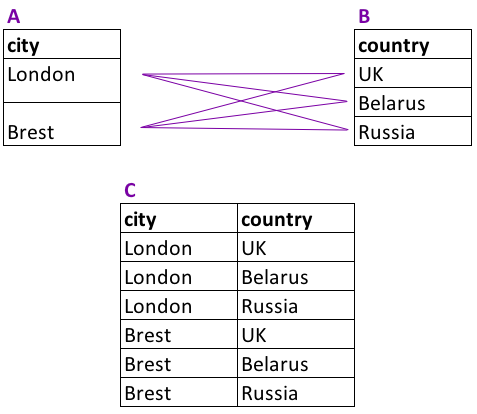

На заметку:

Подробнее с CROSS JOIN можно ознакомиться здесь.

А теперь давайте решим простую задачу.

Задание:

Из таблицы users отберите id первых 100 пользователей (просто выберите первые 100 записей, используя простой LIMIT) и с помощью CROSS JOIN объедините их со всеми наименованиями товаров из таблицы products. Выведите две колонки — id пользователя и наименование товара. Результат отсортируйте сначала по возрастанию id пользователя, затем по имени товара — тоже по возрастанию.

Поля в результирующей таблице: user_id, name

После того как решите задачу, посмотрите сколько было изначально строк в каждой таблице и сравните с тем, сколько их получилось после объединения.



##### ОТВЕТ:

In [ ]:
SELECT user_id, 
        name
FROM (SELECT user_id FROM users LIMIT 100) t1
CROSS JOIN products
ORDER BY 1, 2

## Задача 9.
Кажется, мы рассмотрели уже достаточно примеров объединения таблиц. Пора переходить к практике!

Давайте проведём небольшую аналитику нашего сервиса и посчитаем, сколько в среднем товаров заказывает каждый пользователь.

Задача может звучать довольно абстрактно на языке бизнеса, но не переживайте! Будем решать её поэтапно, постепенно переводя её на язык SQL.

Задание:

Для начала объедините таблицы user_actions и orders — это вы уже умеете делать. В качестве ключа используйте поле order_id. Выведите id пользователей и заказов, а также список товаров в заказе. Отсортируйте таблицу по id пользователя по возрастанию, затем по id заказа — тоже по возрастанию. Добавьте LIMIT 1000.

Поля в результирующей таблице: user_id, order_id, product_ids

Пояснение:

Перед тем как объединять таблицы, подумайте, какой тип соединения можно использовать. Попробуйте разные способы и сравните результаты.

##### ОТВЕТ:

In [ ]:
SELECT user_id,
        l.order_id AS order_id,
        product_ids
FROM user_actions l
LEFT JOIN orders r
USING(order_id)
ORDER BY 1,2
LIMIT 1000

In [ ]:
SELECT user_id,
        l.order_id AS order_id,
        product_ids
FROM user_actions l
JOIN orders r
USING(order_id)
ORDER BY 1,2
LIMIT 1000

## Задача 10.
Теперь немного уточним наш запрос, поскольку нас интересуют не все заказы из таблицы user_actions, а только те, которые не были отменены пользователями, причём уникальные.

Задание:

Снова объедините таблицы user_actions и orders, но теперь оставьте только уникальные неотменённые заказы (мы делали похожий запрос на прошлом уроке). Остальные условия задачи те же: вывести id пользователей и заказов, а также список товаров в заказе. Отсортируйте таблицу по id пользователя по возрастанию, затем по id заказа — тоже по возрастанию. Добавьте LIMIT 1000.

Поля в результирующей таблице: user_id, order_id, product_ids

Пояснение:

Обратите внимание, что отфильтровать значения вы можете двумя способами. Это можно сделать либо до объединения таблиц, либо после него. Рекомендуется делать фильтрацию до объединения, так как в таком случае вы заранее уменьшаете количество строк в одной из таблиц и тем самым ускоряете процесс объединения. Однако для этого потребуется написать вложенный запрос.

##### ОТВЕТ:

In [ ]:
SELECT user_id,
        l.order_id AS order_id,
        product_ids
FROM (SELECT user_id, order_id
          FROM user_actions 
         WHERE order_id NOT IN  (SELECT order_id
                                  FROM user_actions
                                 WHERE action = 'cancel_order'))  l
LEFT JOIN orders r
USING(order_id)
ORDER BY 1,2
LIMIT 1000


In [ ]:
# -- А так не сработало...
# -- SELECT DISTINCT(order_id),
# --             user_id
# --     FROM user_actions
# --     WHERE action != 'cancel_order')

## Задача 11.
Кажется, всё готово к тому, чтобы для каждого пользователя посчитать среднее количество товаров в заказе.

Задание:

Используя запрос из предыдущего задания, посчитайте, сколько в среднем товаров заказывает каждый пользователь. Выведите id пользователя и среднее количество товаров в заказе. Среднее значение округлите до двух знаков после запятой. Колонку посчитанными значениями назовите avg_order_size. Результат выполнения запроса отсортируйте по возрастанию id пользователя. Добавьте LIMIT 1000.

Поля в результирующей таблице: user_id, avg_order_size

Пояснение:

Для решения вам пригодится функция array_length. Мы рассматривали её в этом задании.

Если совсем не получается:

Чтобы решить задачу, достаточно взять запрос из прошлого задания, посчитать размер неотменённых заказов, а затем сделать группировку по пользователям и для каждого из них посчитать средний размер заказа.

##### ОТВЕТ:

In [ ]:
SELECT user_id,
    ROUND(AVG(array_length(product_ids, 1)),2) AS avg_order_size
FROM
    (SELECT user_id,
        l.order_id AS order_id,
        product_ids
    FROM (SELECT user_id, order_id
          FROM user_actions 
         WHERE order_id NOT IN  (SELECT order_id
                                  FROM user_actions
                                 WHERE action = 'cancel_order'))  l
    LEFT JOIN orders r
    USING(order_id)
    ) t1
GROUP BY 1
ORDER BY 1
LIMIT 1000


## Задача 12.
А что если бы мы захотели сделать более подробную аналитику и, например, посчитать среднюю стоимость заказа (средний чек) каждого клиента? Для этого нам бы уже потребовалась информация о стоимости каждого отдельного заказа. Давайте проведём такие расчёты.

Задание:

Для начала к таблице с заказами (orders) примените функцию unnest, как мы делали в прошлом уроке. Колонку с id товаров назовите product_id. Затем к образовавшейся расширенной таблице по ключу product_id добавьте информацию о ценах на товары (из таблицы products). Должна получиться таблица с заказами, товарами внутри каждого заказа и ценами на эти товары. Выведите колонки с id заказа, id товара и ценой товара. Результат отсортируйте сначала по возрастанию id заказа, затем по возрастанию id товара. Добавьте LIMIT 1000.

Поля в результирующей таблице: order_id, product_id, price

##### ОТВЕТ:

In [ ]:
SELECT 
    order_id,
    l.product_id AS product_id,
    price
FROM
    (SELECT 
        order_id,
        product_ids,
        UNNEST(product_ids) AS product_id
    FROM orders
    ) l
LEFT JOIN products r
USING(product_id)
ORDER BY 1, 2
LIMIT 1000

## Задача 13.
Имея таблицу с заказами, входящими в них товарами и ценами на эти товары, можно теперь легко посчитать стоимость каждого заказа.

Задание:

Используя запрос из предыдущего задания, рассчитайте суммарную стоимость каждого заказа. Выведите колонки с id заказов и их стоимостью. Колонку со стоимостью заказа назовите order_price. Результат отсортируйте по возрастанию id заказа. Добавьте LIMIT 1000.

Поля в результирующей таблице: order_id, order_price

##### ОТВЕТ:

In [ ]:
SELECT order_id, 
    SUM(price) AS order_price
FROM
    (SELECT 
        order_id,
        l.product_id AS product_id,
        price
    FROM
        (SELECT 
            order_id,
            product_ids,
            UNNEST(product_ids) AS product_id
        FROM orders
        ) l
    LEFT JOIN products r
    USING(product_id)
    ) t1
GROUP BY 1
ORDER BY 1
LIMIT 1000

## Задача 14.
Вот теперь у нас есть всё необходимое, чтобы сделать наш первый серьёзный аналитический запрос и посчитать разные пользовательские метрики!

Давайте объединим в один запрос данные о количестве товаров в заказах наших пользователей с информацией о стоимости каждого заказа, а затем рассчитаем несколько полезных показателей.

Задача:

Объедините запрос из предыдущего задания с частью запроса, который вы составили в задаче 11, то есть объедините запрос со стоимостью заказов с запросом, в котором вы считали размер каждого заказа из таблицы user_actions.

На основе объединённой таблицы для каждого пользователя рассчитайте следующие показатели:

общее число заказов — колонку назовите orders_count
среднее количество товаров в заказе — avg_order_size
суммарную стоимость всех покупок — sum_order_value
среднюю стоимость заказа — avg_order_value
минимальную стоимость заказа — min_order_value
максимальную стоимость заказа — max_order_value
Полученный результат отсортируйте по возрастанию id пользователя. Добавьте LIMIT 1000. Помните, что в расчётах мы по-прежнему учитываем только неотменённые заказы. При расчёте средних значений, округляйте их до двух знаков после запятой.

Поля в результирующей таблице: 

user_id, orders_count, avg_order_size, sum_order_value, avg_order_value, min_order_value, max_order_value

Пояснение:

Для решения задачи нужно просто объединить запросы, которые вы уже написали на прошлых шагах, и сделать группировку с агрегацией. Подумайте, какой ключ и тип соединения нужно использовать. Если ваш запрос кажется слишком громоздким и сложным для восприятия, воспользуйтесь оператором WITH и табличными выражениями.

##### ОТВЕТ:

In [ ]:
# МОЕ
SELECT user_id,
        COUNT(tl.order_id) AS orders_count,
        ROUND(AVG(array_length(product_ids, 1)),2) AS avg_order_size,
        SUM(order_price) AS sum_order_value,
        ROUND(AVG(order_price),2) AS avg_order_value,
        MIN(order_price) AS min_order_value,
        MAX(order_price) AS max_order_value
FROM
    (SELECT order_id, 
        SUM(price) AS order_price
    FROM (SELECT 
            order_id,
            l.product_id AS product_id,
            price
        FROM
            (SELECT 
                order_id,
                product_ids,
                UNNEST(product_ids) AS product_id
            FROM orders
            ) l
        LEFT JOIN products r
        USING(product_id)
        ) t1
    GROUP BY 1
    ) tl
JOIN (SELECT user_id,
        l.order_id AS order_id,
        product_ids
    FROM (SELECT user_id, order_id
          FROM user_actions 
         WHERE order_id NOT IN  (SELECT order_id
                                  FROM user_actions
                                 WHERE action = 'cancel_order'))  l
    LEFT JOIN orders r
    USING(order_id)
    ) tr
USING(order_id)
GROUP BY 1
ORDER BY 1
LIMIT 1000

In [ ]:
# ЧУЖОЕ С WITH
WITH user_orders AS
    (SELECT user_id, o.order_id
       FROM 
           (
            SELECT user_id, order_id
              FROM user_actions 
             WHERE order_id NOT IN  (SELECT order_id
                                       FROM user_actions
                                      WHERE action = 'cancel_order')
              ) AS u
        LEFT JOIN orders AS o
        ON u.order_id = o.order_id
    ),
     product_price AS
    (SELECT o.order_id, 
            COUNT(p.product_id) AS amount_product, 
            SUM(p.price) AS price_order
      FROM
           (SELECT order_id, unnest(product_ids) AS product_id
              FROM orders) AS o
      LEFT JOIN products AS p
        ON o.product_id = p.product_id
     GROUP BY o.order_id   
     ) 

SELECT u.user_id,
       COUNT(u.order_id) AS orders_count,
       ROUND(AVG(amount_product), 2) AS avg_order_size,
       SUM(price_order) AS sum_order_value,
       ROUND(AVG(price_order), 2) avg_order_value,
       MIN(price_order) AS min_order_value,
       MAX(price_order) AS max_order_value
  FROM user_orders AS u
  JOIN product_price AS p
    ON u.order_id = p.order_id
 GROUP BY u.user_id   
 ORDER BY u.user_id 
 LIMIT 1000
 

## Задача 15.
С большой задачей мы справились — теперь давайте решим несколько дополнительных задач на закрепление новых знаний.

Задание:

По таблицам orders и products определите 10 самых популярных товаров. Самыми популярными товарами будем считать те, которые встречались в заказах чаще всего. Если товар встречается в одном заказе несколько раз (было куплено несколько единиц товара), то при подсчёте учитываем только одну единицу товара. Выведите наименования товаров и сколько раз они встречались в заказах. Новую колонку с количеством покупок товара назовите times_purchased. Обратите внимание, мы не учитываем товары из отмененных заказов!

Поля в результирующей таблице: name, times_purchased

Пояснение:

Мы уже решали похожую задачу на прошлом уроке. Попробуйте модифицировать свой запрос таким образом, чтобы он выводил наименования товаров, а не id. Также не забудьте учесть, что теперь несколько вхождений товара в заказ считаем, как одно вхождение.



##### ОТВЕТ:

In [ ]:
SELECT  name, 
    times_purchased
FROM (SELECT  product_id,
            COUNT(product_id) AS times_purchased
        FROM (SELECT 
             DISTINCT order_id,
            UNNEST(product_ids) AS product_id
            FROM orders
             WHERE order_id NOT IN  (SELECT order_id
                                       FROM user_actions
                                      WHERE action = 'cancel_order')
            ) qq
        GROUP BY 1
    ) l
JOIN products r
USING(product_id)
ORDER BY 2 DESC 
LIMIT 10

## Задача 16.
На одном из прошлых уроков мы считали долю отменённых заказов (cancel_rate) для каждого пользователя. Теперь в нашем распоряжении есть все необходимые знания, чтобы посчитать этот показатель в разрезе пола.

Задание:

Возьмите запрос, составленный на одном из прошлых уроков, и подтяните в него из таблицы users данные о поле пользователей, таким образом, чтобы все пользователи из таблицы users_actions остались в результате. Затем посчитайте среднее значение cancel_rate для каждого пола, округлив его до трёх знаков после запятой. Колонку с посчитанным средним значением назовите avg_cancel_rate.

Помните про отсутствие информации о поле некоторых пользователей после join, так как не все пользователи из таблицы user_action есть в таблице users. Для этой группы тоже посчитайте cancel_rate и в результирующей таблице для пустого значения в колонке с полом укажите ‘unknown’ (без кавычек). Возможно, для этого придётся вспомнить, как работает COALESCE.

Результат отсортируйте по колонке с полом пользователя по возрастанию.

Поля в результирующей таблице: sex, avg_cancel_rate

Эту метрику в разрезе пола можно посчитать разными способами, в нашем случае давайте посчитаем так:

1. Сначала высчитаем avg_cancel_rate для каждого юзера.

2. Теперь приджойним информацию о поле юзеров.

3. Усредним avg_cancel_rate  по полу и округлим до 3х знаков.

##### ОТВЕТ:

In [ ]:
SELECT COALESCE(sex,'unknown') AS sex,
    ROUND(AVG(cancel_rate),3) AS avg_cancel_rate
FROM (SELECT 
        user_id,
        (COUNT(order_id)  FILTER (WHERE action = 'cancel_order')/ CAST(COUNT(DISTINCT(order_id)) AS DECIMAL) )  AS cancel_rate
        FROM user_actions
        GROUP BY 1
    ) l
LEFT JOIN users r
USING(user_id)
GROUP BY 1
ORDER BY 1

## Задача 17.
Задание:

По таблицам orders и courier_actions определите id десяти заказов, которые доставляли дольше всего.

Поле в результирующей таблице: order_id

Пояснение:

Для расчёта времени, затраченного на доставку заказа, используйте информацию о времени доставки и времени создания заказа — с данными в формате времени можно тоже проводить арифметические операции (например, вычислять разницу между ними). Обратите внимание, что колонки с этими данными находятся в разных таблицах. Для определения самых долгих заказов используйте оператор LIMIT. 

##### ОТВЕТ:

In [ ]:
SELECT order_id
FROM
    (SELECT order_id,
           start,
           finish,
           finish-start AS all_time
    FROM       
        (SELECT creation_time as start,
                order_id
        FROM orders
        ) l
    JOIN
        (SELECT time as finish,
        order_id
        FROM courier_actions
        WHERE action ='deliver_order'
        ) r
    USING(order_id) 
    ORDER BY all_time DESC
    )t1
LIMIT 10

## * Задача 18.
На днях менеджер снова обратился к вам с задачей: попросил сделать выгрузку из таблицы orders со всеми заказами и их содержимым. Из переписки вы так и не поняли, зачем ему все эти данные, но задачу сделали: нажали SELECT * и отправили ему excel-файл с заказами. На следующее утро выяснилось, что такие данные его не устраивают, так как он не понимает, что это за списки с наборами чисел. Действительно, этот момент вы не учли. Давайте исправляться!

Задача:

Произведите замену списков с id товаров из таблицы orders на списки с наименованиями товаров. Наименования возьмите из таблицы products. Колонку с новыми списками наименований назовите product_names. Добавьте LIMIT 1000.

Поля в результирующей таблице: order_id, product_names

Пояснение:

Для решения задачи вам нужно сделать unnest колонки product_ids, соединить промежуточный результат с таблицей products для получения наименований товаров, а затем сделать обратно группировку с агрегацией в список наименований. 

Для того чтобы сделать агрегацию значений в колонке в список, необходимо воспользоваться функцией array_agg.

array_agg — это продвинутая агрегирующая функция, которая собирает все значения в указанном столбце в единый список (ARRAY). По сути array_agg — это операция, обратная unnest, её синтаксис ничем не отличается от синтаксиса остальных агрегирующих функций:

SELECT column_1, array_agg(column_2) AS new_array
FROM table
GROUP BY column_1


Перед тем как решать задачу, попробуйте сначала выполнить простое упражнение: разверните списки с id товаров, поместите результат в подзапрос, а потом сразу же сверните всё обратно в списки с помощью array_agg. Алгоритм решения этой задачи примерно такой же.

На заметку:

Подробнее про функцию array_agg можно почитать здесь.



##### ОТВЕТ:

In [ ]:
SELECT l.order_id AS order_id,
        array_agg(name) AS product_names
FROM
    (SELECT order_id,
            UNNEST(product_ids) as product_id
    FROM orders
    ) l
JOIN
    (SELECT product_id,
            name
    FROM products
    ) r
USING(product_id)
GROUP BY 1
LIMIT 1000

In [ ]:
# тоже мое немного короче
SELECT l.order_id AS order_id,
        array_agg(name) AS product_names
FROM
    (SELECT order_id,
            UNNEST(product_ids) as product_id
    FROM orders
    ) l
JOIN products r
USING(product_id)
GROUP BY 1
LIMIT 1000

## ** Задача 19.
И ещё одна задача посложнее — подарок под конец рабочего дня от нашего руководителя.

Задание:

Выясните, кто заказывал и доставлял самые большие заказы. Самыми большими считайте заказы с наибольшим числом товаров.

Выведите id заказа, id пользователя и id курьера. Также в отдельных колонках укажите возраст пользователя и возраст курьера. Возраст измерьте числом полных лет, как мы делали в прошлых уроках. Считайте его относительно последней даты в таблице user_actions — как для пользователей, так и для курьеров. Колонки с возрастом назовите user_age и courier_age. Результат отсортируйте по возрастанию id заказа.

Поля в результирующей таблице: order_id, user_id, user_age, courier_id, courier_age



##### ОТВЕТ:

In [ ]:
SELECT  order_id,
        user_id,
        DATE_PART('year', AGE((SELECT MAX(time) FROM user_actions), users.birth_date)) AS user_age,
        courier_id,
        DATE_PART('year', AGE((SELECT MAX(time) FROM user_actions), couriers.birth_date)) AS courier_age
FROM orders
LEFT JOIN user_actions
USING(order_id)
LEFT JOIN courier_actions
USING(order_id)
LEFT JOIN users
USING(user_id)
LEFT JOIN couriers
USING(courier_id)
WHERE array_length(product_ids,1) = (SELECT MAX(array_length(product_ids,1)) FROM orders) AND courier_actions.action = 'deliver_order'
ORDER BY 1

## ** Задача 20.
И напоследок рассмотрим ещё один тип объединения таблиц, который тоже нужно знать. Это так так называемый SELF JOIN. 

SELF JOIN — не что иное, как объединение таблицы с самой собой. Да, такая операция тоже возможна и, более того, часто бывает полезна.

Присоединить таблицу к самой себе можно с помощью любого рассмотренного ранее типа джойна:

SELECT ...
FROM table JOIN table
     ON [condition]


SELECT ...
FROM table LEFT JOIN table
     ON [condition]


SELECT ...
FROM table FULL JOIN table
     ON [condition]


SELECT ...
FROM table CROSS JOIN table


На заметку:

Подробнее о SELF JOIN можно узнать здесь.

Зачем это вообще может быть нужно? Давайте разберёмся на реальном примере!

Мы уже почти в конце первого модуля, поэтому, как и обещали, сложная и вместе с тем творческая задача, сформулированная на загадочном языке бизнеса.

Задание:

Выясните, какие пары товаров покупают вместе чаще всего.

Пары товаров сформируйте на основе таблицы с заказами. Отменённые заказы не учитывайте. В качестве результата выведите две колонки — колонку с парами наименований товаров и колонку со значениями, показывающими, сколько раз конкретная пара встретилась в заказах пользователей. Колонки назовите соответственно pair и count_pair.

Пары товаров должны быть представлены в виде списков из двух наименований. Пары товаров внутри списков должны быть отсортированы в порядке возрастания наименования. Результат отсортируйте сначала по убыванию частоты встречаемости пары товаров в заказах, затем по колонке pair — по возрастанию.

Поля в результирующей таблице: pair, count_pair

Пояснение:

В этой задаче вам необходимо сделать SELF JOIN. Подумайте, какую таблицу нужно присоединить к самой себе и заранее обработайте данные. Для решения рекомендуем воспользоваться табличными выражениями. Также вам могут пригодиться функции для работы со списками. Ознакомьтесь с примерами из документации и подумайте, что можно использовать в своём решении.

Задача творческая и может быть решена разными способами.

Небольшая подсказка на случай, если нет идей:

Для каждой пары товаров вам необходимо посчитать, сколько раз она встретилась в заказах пользователей. Главная загвоздка заключается в том, что при самоджойне каждый товар образует пару с самим собой («A-A») и при этом каждая пара встречается дважды («A-B» и «B-A»). Суть задачи состоит в том, чтобы избавиться от этих двух проблем и получить корректные расчёты.

##### ОТВЕТ:

In [ ]:
# МОЕ-- готово )
WITH names AS
    (SELECT order_id, name
    FROM
    (SELECT order_id, UNNEST(product_ids) AS product_id FROM orders 
            WHERE order_id  NOT IN (SELECT order_id FROM user_actions WHERE action = 'cancel_order')
            ) l
    JOIN products r
    USING(product_id)
    )
    
SELECT pair,
    COUNT(DISTINCT(order_id)) AS count_pair
FROM
    (SELECT order_id, ARRAY[t1.name,t2.name] AS pair
    FROM names t1
    JOIN names t2
    USING(order_id)
    WHERE  t1.name < t2.name 
    ) tt1
GROUP BY 1 
ORDER BY 2 DESC, 1

#  БЕЗ этого тоже норм-- t1.name != t2.name AND

In [ ]:
# 8-21 от Карпова
WITH main_table AS (
        SELECT DISTINCT order_id, product_id, name
        FROM (
            SELECT order_id, unnest(product_ids) AS product_id
            FROM orders 
            WHERE order_id NOT IN (SELECT order_id FROM user_actions WHERE action='cancel_order')
            and order_id IN (SELECT order_id FROM user_actions WHERE action='create_order')
        ) t
        JOIN products USING(product_id)
        ORDER BY order_id, name
    )

    SELECT pair, COUNT(order_id) AS count_pair
    FROM (
        SELECT DISTINCT
            a.order_id, 
            CASE 
            WHEN a.name > b.name THEN string_to_array(CONCAT(b.name, '+', a.name), '+')
            ELSE string_to_array(CONCAT(a.name, '+', b.name), '+')
            END AS pair
        FROM main_table a
        JOIN main_table b 
        ON a.order_id = b.order_id AND a.name != b.name
    ) t
    GROUP BY pair
    ORDER BY count_pair DESC, pair

In [ ]:
# чужое
with  cancel_orders as (select order_id
  from user_actions
 where action = 'cancel_order'),
 ord as (select order_id, unnest(product_ids) as product_id
               from orders
              where order_id not in (select order_id from cancel_orders)),
 ordn as (select ord.order_id, products.name
               from ord
               inner join products
                    on ord.product_id = products.product_id)

select ARRAY[p1.name, p2.name] as pair
     , count(distinct p1.order_id)  as count_pair
  from ordn as p1
  inner join ordn as p2
          on p1.order_id = p2.order_id
         and p1.name < p2.name
  group by p1.name, p2.name
  order by count_pair desc, pair
